# Gradient Descent
## Instructions:
* Go through the notebook and complete the tasks. 
* Make sure you understand the examples given. If you need help, refer to the lecture notes, or go to the course discussion forum. 
* Save your notebooks when you are done.

This notebook will give you the chance to implement the gradient descent algorithm to solve a linear regression problem. 

The main steps involved will be:

    Within a loop -
    1. Calculate the hypothesis h 
    2. Calculate the loss 
    3. Calculate the gradient descent update 
    4. stop loop when loss falls stops changing


**non task 1:**

The first task is to load the diabetes dataset (from notebook 3.1), select one feature (bmi, the 2nd indexed feature), and split it into a training set (90%) and a test set (10%). Plot the data as a scatter plot.


feature name:  bmi 


Intercept (theta 0): 
 153.73201108210046
Coefficients (theta 1): 
 [958.76368869]
Mean squared error: 3956.25


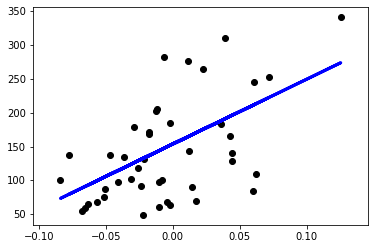

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Select 10% for testing, 90% for training
data_len = len(diabetes.target)
nTestSamples = np.int(0.1*data_len)
idx_test = np.arange(1, nTestSamples)
idx_train = np.arange(idx_test[-1]+1, data_len - idx_test[-1])

# extract the bmi feature
print("feature name: ", diabetes.feature_names[2], "\n\n")
X_diabetes = diabetes.data[:,np.newaxis,2]
# print(X_diabetes)
X_test = X_diabetes[idx_test]
X_train = X_diabetes[idx_train]
y_test = diabetes.target[idx_test]
y_train = diabetes.target[idx_train]

# (For comparison purposes, create linear regression object)
regr = linear_model.LinearRegression()
# Train the model using the training sets

regr.fit(X_train, y_train)
# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Intercept (theta 0): \n', regr.intercept_)
print('Coefficients (theta 1): \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.show()

**Task 2:**

Write a suitable hypothesis function, ```h_lin```, that can handle a single feature vector and a corresponding 2D parameter (theta)


In [2]:
def h_lin(X, theta):
    'X should be a data vector, theta the parameters'
    return (theta[0]+theta[1]*X).flatten()
    
h_lin(X_diabetes, [100, regr.coef_])

array([159.15208254,  50.64853917, 142.61820927,  88.88312112,
        65.11567829,  60.98220997,  54.78200749,  98.18342484,
       159.15208254, 137.45137387,  19.64752678, 116.78403227,
        72.34924785,  98.18342484,  75.44934909,  82.68291864,
       140.55147511, 111.61719688,  89.9164882 ,  82.68291864,
        45.48170378,  78.54945033,  96.11669068, 158.11871546,
       134.35127263,  87.84975404,  25.84772926, 157.08534838,
        79.58281741,  94.04995652, 142.61820927,  37.21476714,
       220.12074024,  51.68190625,  39.2815013 ,  70.28251369,
       121.95086767, 110.5838298 , 168.45238626, 113.68393103,
        91.98322236,  35.14803298,  89.9164882 ,  77.51608325,
       165.35228502,  66.14904537,  88.88312112,  29.98119758,
        59.94884289, 113.68393103,  93.01658944, 115.75066519,
        90.94985528,  84.7496528 , 124.01760183,  52.71527333,
       139.51810803,  39.2815013 ,  38.24813422,  75.44934909,
        96.11669068, 104.38362732,  93.01658944,  64.08

**Task 3:**

Write a suitable loss function, ```loss_L2```, that calculates the least-squares loss between a given hypothesis and the target value.


In [3]:
import math
def loss_L2( h, y ):
    'Calculate the least-squares loss.' 
    'h is a vector of predictions by the hypothesis function, y is the target'
    return ((h-y)**2).sum()/(2*len(y))

print( loss_L2(h_lin(X_test,[150, 900]), y_test) )

1962.4482591460892


**Task 4:**

Write a suitable function to calculate the gradients, ```gradient_batch```, that operates on both the parameters, ```theta[0]``` (the intercept) and ```theta[1]``` (the gradient coefficient). The function is given the data X, and the target, y. 
(Remember the difference in gradient calculationn for the intercept term.)

In [4]:
def gradient_batch(theta, X, y):
    'Calculate the gradients of the loss function for the parameters in theta'
    'Given data X and target y'
    grad = np.array([0,0])
    for(xi, yi) in zip(X, y):
        grad[0]+= h_lin(xi, theta) - yi
        grad[1]+= (h_lin(xi, theta) - yi)*xi
    return grad

**Task 5:**

Write the batch gradient descent algorithm that iteratively updates the coefficients (an initially selected set of theta values), and stops once the loss function stops changing much (i.e. by about 0.1) 


In [14]:
# set initial theta values
theta = [100, 100]
# set stopping criterion
loss_stop_threshold = 0.01
# learning rate
alpha = 0.5

def batch_gd( X, y, old_theta, alpha, loss_stop_threshold):
    ' Batch gradient descent training fotr linear function with a single variable'
    theta = old_theta.copy()
    # initial loss value
    loss = loss_L2( h_lin(X,theta), y)
    # while...
    delta_loss = 1
    while(delta_loss > loss_stop_threshold):
        # bath gradient for each theta
        theta = old_theta - (alpha * (1/len(y)) * gradient_batch(old_theta, X, y))
        loss = loss_L2( h_lin(X,theta), y)
        old_loss = loss_L2( h_lin(X,old_theta), y)
        delta_loss = abs(old_loss-loss)
        old_theta=theta
#         print(delta_loss)
        print(theta)
    print('GD stopped at loss %s, with coefficients: %s' % (loss,theta))
    return theta


        
theta = batch_gd(X_train, y_train, theta, alpha, loss_stop_threshold)

[126.58028169 100.73380282]
[139.87605634 101.44366197]
[146.61126761 102.12676056]
[150.01549296 102.81830986]
[151.78591549 103.5       ]
[152.82112676 104.18732394]
[153.37887324 104.87887324]
[153.69295775 105.56760563]
[153.87042254 106.25492958]
[153.96197183 106.94366197]
[154.01971831 107.63098592]
[154.04788732 108.31549296]
[154.06760563 109.        ]
[154.08169014 109.68450704]
[154.08309859 110.36901408]
[154.0971831  111.05352113]
[154.1028169  111.73521127]
[154.10422535 112.41549296]
[154.1028169  113.09295775]
[154.1028169  113.77042254]
[154.1        114.44788732]
[154.09577465 115.12394366]
[154.09295775 115.8       ]
[154.09859155 116.47605634]
[154.09577465 117.15211268]
[154.08873239 117.82816901]
[154.08309859 118.50140845]
[154.07605634 119.17323944]
[154.07183099 119.84507042]
[154.06619718 120.51408451]
[154.06760563 121.18309859]
[154.06901408 121.85211268]
[154.07887324 122.51971831]
[154.08873239 123.18591549]
[154.08732394 123.85211268]
[154.09014085 124.51

[154.09014085 284.92816901]
[154.0915493  285.41830986]
[154.08169014 285.9084507 ]
[154.09014085 286.39859155]
[154.09014085 286.88873239]
[154.09014085 287.37605634]
[154.0943662  287.86338028]
[154.0943662  288.35070423]
[154.10140845 288.83802817]
[154.10985915 289.32394366]
[154.10985915 289.80985915]
[154.11408451 290.29577465]
[154.12676056 290.78028169]
[154.12816901 291.26478873]
[154.13098592 291.74929577]
[154.12394366 292.23380282]
[154.12676056 292.71830986]
[154.12535211 293.20140845]
[154.12394366 293.68309859]
[154.11830986 294.16478873]
[154.11267606 294.64647887]
[154.11690141 295.12816901]
[154.10985915 295.60985915]
[154.11267606 296.09014085]
[154.12112676 296.57042254]
[154.11971831 297.05070423]
[154.12535211 297.53098592]
[154.12535211 298.01126761]
[154.12535211 298.48873239]
[154.11830986 298.96619718]
[154.11408451 299.44366197]
[154.11126761 299.91971831]
[154.1084507  300.39577465]
[154.1        300.87042254]
[154.08873239 301.34507042]
[154.08732394 301.81

[154.13239437 419.53521127]
[154.12676056 419.88169014]
[154.12253521 420.22676056]
[154.11690141 420.57183099]
[154.11267606 420.91408451]
[154.10985915 421.25352113]
[154.1084507 421.5915493]
[154.10422535 421.92816901]
[154.1        422.26478873]
[154.1        422.60140845]
[154.10140845 422.93802817]
[154.1056338  423.27464789]
[154.1084507 423.6084507]
[154.10704225 423.94225352]
[154.1056338  424.27464789]
[154.1028169  424.60704225]
[154.09859155 424.93943662]
[154.09577465 425.27183099]
[154.1056338  425.60422535]
[154.1028169  425.93661972]
[154.1        426.26901408]
[154.10422535 426.60140845]
[154.1056338  426.93380282]
[154.10704225 427.26478873]
[154.10422535 427.59577465]
[154.09859155 427.92676056]
[154.1        428.25774648]
[154.1028169  428.58873239]
[154.10140845 428.91830986]
[154.0971831  429.24788732]
[154.0971831  429.57746479]
[154.09014085 429.90704225]
[154.08732394 430.23661972]
[154.08873239 430.56478873]
[154.08873239 430.89295775]
[154.08873239 431.221126

[154.13380282 504.57605634]
[154.13098592 504.81830986]
[154.13239437 505.06056338]
[154.13239437 505.3028169 ]
[154.13239437 505.54507042]
[154.13239437 505.78732394]
[154.13380282 506.02957746]
[154.15633803 506.27183099]
[154.13239437 506.51408451]
[154.14366197 506.75633803]
[154.14647887 506.99859155]
[154.14366197 507.24084507]
[154.14366197 507.48309859]
[154.14366197 507.72535211]
[154.14507042 507.96760563]
[154.14507042 508.20985915]
[154.14507042 508.45211268]
[154.14507042 508.6943662 ]
[154.14788732 508.93661972]
[154.14788732 509.17887324]
[154.14507042 509.42112676]
[154.13943662 509.66338028]
[154.13380282 509.9056338 ]
[154.13098592 510.14788732]
[154.12676056 510.38873239]
[154.12253521 510.62957746]
[154.12253521 510.87042254]
[154.12535211 511.11126761]
[154.12816901 511.35211268]
[154.12957746 511.59295775]
[154.12957746 511.83380282]
[154.12957746 512.07464789]
[154.12957746 512.31549296]
[154.12957746 512.55633803]
[154.12816901 512.79577465]
[154.13239437 513.03

[154.14788732 568.44929577]
[154.14366197 568.63943662]
[154.13239437 568.82957746]
[154.13380282 569.01971831]
[154.13239437 569.2084507 ]
[154.13239437 569.3971831 ]
[154.13239437 569.58450704]
[154.13239437 569.77183099]
[154.13239437 569.95915493]
[154.13239437 570.14647887]
[154.12957746 570.33380282]
[154.12816901 570.52112676]
[154.12816901 570.7084507 ]
[154.12816901 570.89577465]
[154.12816901 571.08309859]
[154.12816901 571.27042254]
[154.12394366 571.45633803]
[154.11830986 571.64225352]
[154.11971831 571.82816901]
[154.12253521 572.01408451]
[154.12253521 572.2       ]
[154.12253521 572.38591549]
[154.12676056 572.57183099]
[154.12535211 572.75774648]
[154.12394366 572.94366197]
[154.12394366 573.12957746]
[154.12394366 573.31549296]
[154.12535211 573.50140845]
[154.12535211 573.68732394]
[154.12535211 573.87323944]
[154.12816901 574.05774648]
[154.12816901 574.24225352]
[154.13661972 574.42676056]
[154.13661972 574.60985915]
[154.13661972 574.79295775]
[154.13661972 574.97

[154.15070423 620.08732394]
[154.14507042 620.23239437]
[154.14507042 620.37605634]
[154.14507042 620.51971831]
[154.13943662 620.66338028]
[154.13943662 620.80704225]
[154.13943662 620.95070423]
[154.13098592 621.0943662 ]
[154.12957746 621.23802817]
[154.12816901 621.38169014]
[154.12676056 621.52535211]
[154.12394366 621.66901408]
[154.12112676 621.81267606]
[154.11971831 621.95633803]
[154.11830986 622.1       ]
[154.11690141 622.24366197]
[154.11690141 622.38732394]
[154.11690141 622.53098592]
[154.11126761 622.67464789]
[154.11126761 622.81830986]
[154.1056338  622.96197183]
[154.1084507 623.1056338]
[154.1056338  623.24929577]
[154.1084507  623.39295775]
[154.11126761 623.53661972]
[154.11690141 623.68028169]
[154.12112676 623.82394366]
[154.12394366 623.96760563]
[154.12535211 624.11126761]
[154.12676056 624.25492958]
[154.12676056 624.39859155]
[154.12676056 624.54225352]
[154.12816901 624.68591549]
[154.12957746 624.82957746]
[154.12676056 624.97323944]
[154.12676056 625.1169

[154.15774648 661.57887324]
[154.15915493 661.68732394]
[154.15915493 661.79577465]
[154.15774648 661.90422535]
[154.15211268 662.01267606]
[154.14647887 662.12112676]
[154.14084507 662.22957746]
[154.13521127 662.33802817]
[154.12957746 662.44647887]
[154.12112676 662.55492958]
[154.11971831 662.66338028]
[154.1056338  662.77183099]
[154.14929577 662.88028169]
[154.13380282 662.98873239]
[154.12253521 663.0971831 ]
[154.12394366 663.20422535]
[154.12535211 663.31126761]
[154.12957746 663.41830986]
[154.13098592 663.52535211]
[154.13239437 663.63239437]
[154.13380282 663.73943662]
[154.13802817 663.84647887]
[154.13802817 663.95352113]
[154.13943662 664.06056338]
[154.13943662 664.16760563]
[154.13802817 664.27464789]
[154.13661972 664.38169014]
[154.13239437 664.48732394]
[154.13098592 664.59295775]
[154.12957746 664.69859155]
[154.12816901 664.80422535]
[154.12676056 664.90985915]
[154.12535211 665.01549296]
[154.12816901 665.12112676]
[154.12676056 665.22676056]
[154.13098592 665.33

[154.10985915 691.07464789]
[154.10422535 691.14929577]
[154.10140845 691.22394366]
[154.09859155 691.29859155]
[154.0943662  691.37323944]
[154.0915493  691.44788732]
[154.09295775 691.52253521]
[154.09014085 691.5971831 ]
[154.0915493  691.67183099]
[154.0915493  691.74647887]
[154.0915493  691.82112676]
[154.08591549 691.89577465]
[154.0915493  691.97042254]
[154.09014085 692.04507042]
[154.08873239 692.11971831]
[154.09014085 692.1943662 ]
[154.09014085 692.26901408]
[154.09014085 692.34366197]
[154.09014085 692.41830986]
[154.09014085 692.49295775]
[154.09295775 692.56760563]
[154.09577465 692.64225352]
[154.09859155 692.71690141]
[154.10140845 692.7915493 ]
[154.1        692.86619718]
[154.1        692.94084507]
[154.1        693.01549296]
[154.1        693.09014085]
[154.1        693.16478873]
[154.10140845 693.23943662]
[154.1028169  693.31408451]
[154.10422535 693.38873239]
[154.1        693.46338028]
[154.10140845 693.53802817]
[154.1028169  693.61267606]
[154.09859155 693.68

In [8]:
# Add x0 of 1s
def batch_gradient_descent_analytic(X, y):
    x0 = np.array([1]*len(X_train)) 
    X = np.array([x0, X.flatten()]).T
    return np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)

theta = batch_gradient_descent_analytic(X_train, y_train)

**Task 6:**

Train your algorithm using the training data, then test it using the test set. Compare the performance of your algorithm to the sklearn solution. Have a play with some of the parameters you can tweak, particularly learning rate and stopping criterion.



Intercept (theta 0): 
 153.7320110821005
Coefficients (theta 1): 
 958.7636886887224
Mean squared error: 3956.25


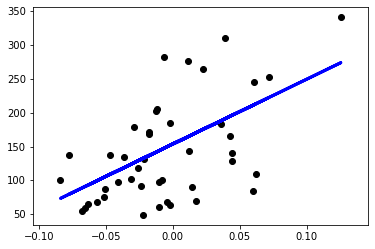

In [13]:
# Analytic solution
theta_anal = batch_gradient_descent_analytic(X_train, y_train)
# 
y_pred =  h_lin( X_test, theta_anal)
# The coefficients
print('Intercept (theta 0): \n', theta[0])
print('Coefficients (theta 1): \n', theta[1])

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Plot outputs using test data
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.show()
